# Signalverarbeitung - Praktikum 2

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.hrz.tu-chemnitz.de%2Fjs68viga--tu-freiberg.de%2Fsignalverarbeitung-ss23/HEAD?labpath=%2FP-2%2FSigProc_Praktikum02.ipynb)

Herzlich willkommen zum zweiten Praktikum der Lehrveranstaltung "Signalverarbeitung" im Sommersemester 2023!

Im zweiten Praktikum geht es um Orthogonalität von Funktionen sowie um grundlegende Signaloperationen im Zeitbereich, insbesondere um die Faltung.

# Einführung
Im Zusammenhang mit der Faltung sei nochmal darauf hingewiesen, dass wir es im Rahmen der digitalen Signalverarbeitung grundsätzlich mit zeidiskreten Signalen zu tun haben. Auf die Zusammenhänge zwischen zeitkontinuierlichen und zeitdiskreten Signalen (vgl. Signalabtastung und -rekonstruktion) wird an dieser Stelle noch nicht weiter eingegangen. Zur Darstellung zeitdiskreter Signale bzw. Folgen eignen sich (insbesondere bei wenigen Signalwerten) Stabdiagramme (Stem Plots):

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import special

# Array mit Zufallszahlen erstellen für Signale
random = np.random.rand(100) 

Erstellen eines zufälligen Signals und Darstellung als stem plot:

<StemContainer object of 3 artists>

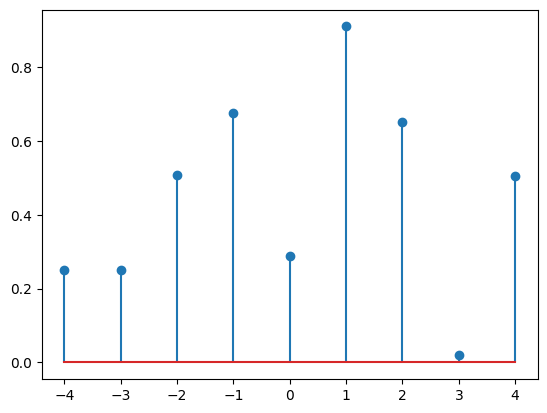

In [2]:
def x(k):
    """ Funktion zur Definition eines zufälligen Signals in Abhängigkeit vom Index k """
    x = np.take(random, k, mode="wrap")
    return x   

k = np.arange(-4, 5)
x1 = x(k)
plt.stem(k, x1)

## Übung 1: Gerade und ungerade Anteile eines zufälligen Signals

Zerlegen Sie das oben definierte zufällige Signal x1 in einen geraden und einen ungeraden Anteil und stellen Sie die Anteile in Diagrammen dar. 

In [3]:
x1_even   = (x(k) - x(-k)) / 2;
x1_uneven = (x(k) + x(-k)) / 2;

print(x1_even, x1_uneven);

[-0.12729213  0.1149269  -0.07155491 -0.11721085  0.          0.11721085
  0.07155491 -0.1149269   0.12729213] [0.37685425 0.13456865 0.58053545 0.79333896 0.28982215 0.79333896
 0.58053545 0.13456865 0.37685425]


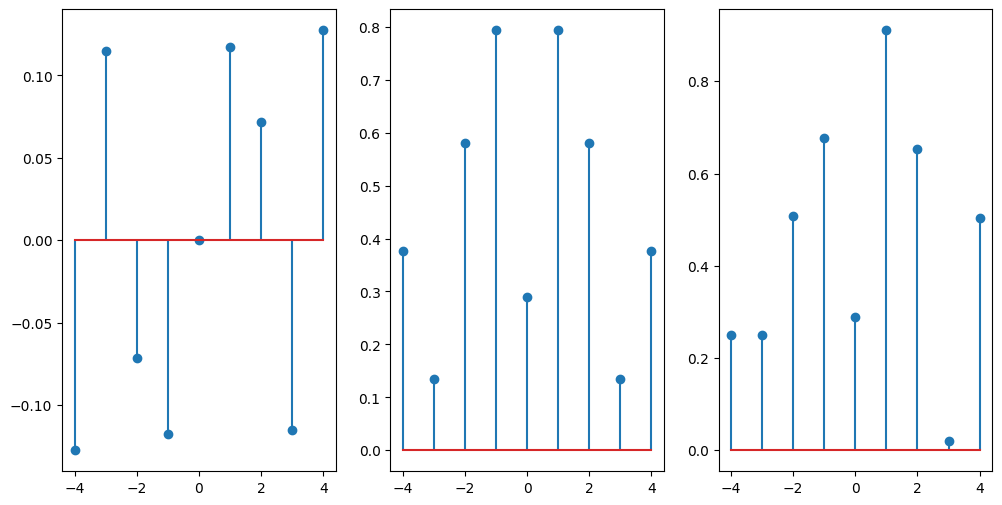

In [4]:
_, ax = plt.subplots(1, 3, figsize=(12, 6))
ax[0].stem(k, x1_even);
ax[1].stem(k, x1_uneven);
ax[2].stem(k, x1_even + x1_uneven);

In [5]:
# %load solution_1

# Aufgabe 1: Orthogonalität
Die folgenden Funktionen sollen hinsichtlich ihrer Orthogonalität untersucht werden. 

## a) Sinus-Funktion
Gegeben ist die folgende Sinusfunktion $x(t) = \sin\left(\frac{2\pi}{3} \, n t\right)$

* Stellen Sie die Funktion für $n = \{1; 2; 3\}$ über ein Orthogonalitätsintervall in einem Diagramm dar. 
* Zeigen Sie, dass es sich dabei um orthogonale Funktionen handelt.

x(t, 1) * x(t, 2) = 0.0
x(t, 2) * x(t, 3) = 0.0
x(t, 3) * x(t, 1) = 0.0


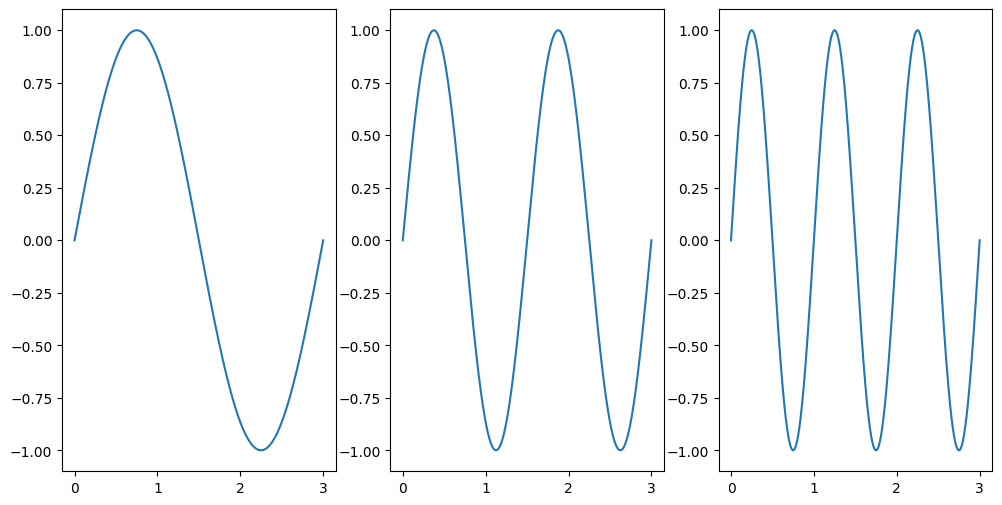

In [6]:
def x(t: np.ndarray, n: int) -> np.ndarray:
    return np.sin(2 * np.pi / 3 * n * t);

tau = np.linspace(0, 6/2, 1000)

_, ax = plt.subplots(1, 3, figsize=(12, 6))
ax[0].plot(tau, x(tau, 1));
ax[1].plot(tau, x(tau, 2));
ax[2].plot(tau, x(tau, 3));

print("x(t, 1) * x(t, 2) = ", round(np.dot(x(tau, 1), x(tau, 2)), 10), '\n',
      "x(t, 2) * x(t, 3) = ", round(np.dot(x(tau, 2), x(tau, 3)), 10), '\n',
      "x(t, 3) * x(t, 1) = ", round(np.dot(x(tau, 3), x(tau, 1)), 10), sep='');

## b) Spaltfunktion
Die Spaltfunktion spielt im Zusammenhang mit der Samplingreihe eine wichtige Rolle für die Abtastung bzw. Rekonstruktion von Signalen. Sie ist wie folgt definiert: $\mathrm{si}(x) = \frac{\sin(x)}{x}$


Hinweis:
> Im englischen Sprachgebrauch wird sie als sinc function (von Sinus cardinalis) bezeichnet, aber leider uneinheitlich definiert, namlich entweder genauso wie oben oder aber abweichend als: $\mathrm{sinc}(x) = \mathrm{si}(\pi \ x) = \frac{\sin(\pi \ x)}{\pi \ x}$
>
> vgl. <cite>R. Hoffmann und M. Wolff, Intelligente Signalverarbeitung 1. Berlin, Heidelberg: Springer Berlin Heidelberg, 2014. doi: [10.1007/978-3-662-45323-0](https://doi.org/10.1007/978-3-662-45323-0), S. 51 f. 

In Numpy und Scipy ist die Spaltfunktion nach der unteren Definition (normierte Spaltfunktion) implementiert: [`numpy.sinc`](https://numpy.org/doc/stable/reference/generated/numpy.sinc.html) und [`scipy.special.sinc`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.sinc.html)

* Stellen Sie die Funktion $x(t) =  \mathrm{si}(\pi (t-n))$ für zwei beliebig gewählte ganzzahlige $n$ in einem Abschnitt von $-10 < t < 10$ dar! 
* Prüfen Sie die Orthogonalität der beiden Funktionen in dem dargestellten Intervall und diskutieren Sie das Ergebnis. Welchen Einfluss hat das gewählte Intervall auf die Orthogonalität der beiden Funktionen?


In [7]:
def x(t: np.ndarray, n: int) -> np.ndarray:
    return np.sinc(t - n);

In [8]:
import random
all_n = (random.randint(1, 10), random.randint(1, 10));

x(t, 2) * x(t, 5) = 0.5840990384


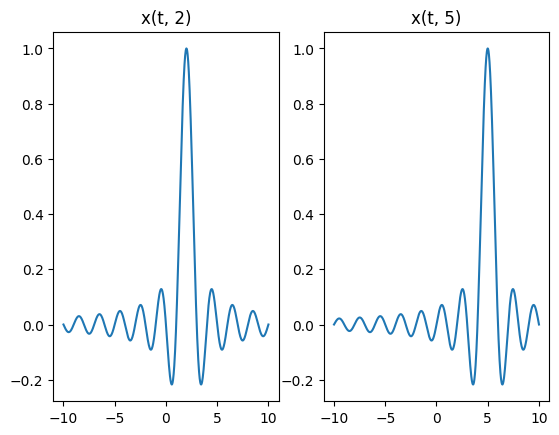

In [9]:
tau = np.linspace(-10, 10, 1000); 

for t, n in enumerate(all_n):
    plt.subplot(1, 2, t + 1)
    plt.plot(tau, x(tau, n));
    plt.title(f"x(t, {n})");

print(f"x(t, {all_n[0]}) * x(t, {all_n[1]}) =", round(np.dot(x(tau, all_n[0]), x(tau, all_n[1])), 10))

In [10]:
for t in range(21):
    tau = np.linspace(-10, t, 1000);
    print(f"[{t}] x(t, {all_n[0]}) * x(t, {all_n[1]}) =", round(np.dot(x(tau, all_n[0]), x(tau, all_n[1])), 10))

[0] x(t, 2) * x(t, 5) = -1.1608246912
[1] x(t, 2) * x(t, 5) = -1.7517506845
[2] x(t, 2) * x(t, 5) = -4.629623153
[3] x(t, 2) * x(t, 5) = -0.5886620438
[4] x(t, 2) * x(t, 5) = 1.0842376296
[5] x(t, 2) * x(t, 5) = 4.2053297056
[6] x(t, 2) * x(t, 5) = 1.6747486038
[7] x(t, 2) * x(t, 5) = 1.125586302
[8] x(t, 2) * x(t, 5) = 0.8567688196
[9] x(t, 2) * x(t, 5) = 0.6940156973
[10] x(t, 2) * x(t, 5) = 0.5840990384
[11] x(t, 2) * x(t, 5) = 0.5046186821
[12] x(t, 2) * x(t, 5) = 0.4443650424
[13] x(t, 2) * x(t, 5) = 0.3970666638
[14] x(t, 2) * x(t, 5) = 0.3589270311
[15] x(t, 2) * x(t, 5) = 0.3275079505
[16] x(t, 2) * x(t, 5) = 0.3011696098
[17] x(t, 2) * x(t, 5) = 0.278767417
[18] x(t, 2) * x(t, 5) = 0.2594776222
[19] x(t, 2) * x(t, 5) = 0.242691964
[20] x(t, 2) * x(t, 5) = 0.2279513652


Es scheint, dass wenn das Intervall ein vielfaches von 3 lang ist ($|[-10, 2]| = 2 - -10 = 12 = 4 * 3$, ...) man eine Orthogonalität feststellen kann.

# Aufgabe 2: Faltung im Zeitbereich
Für die digitale Signalverarbeitung wird in den folgenden Praktika die Faltung von zeitdiskreten Signalen erforderlich sein um das Übertragungsverhalten von LTI-Systemen zu beschreiben.
* Implementieren Sie einen Algorithmus für die Faltung der folgenden zeitdiskreten Signale x1 und x2.
* Stellen Sie die Zwischenschritte Ihrer Berechnung grafisch dar (z.B. durch einzelne Diagramme für jeden Summanden der Faltungssumme).
* Vergleichen Sie Ihr Ergebnis mit der Faltung der beiden Signale bei Nutzung von [`numpy.convolve()`](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html) oder [`scipy.signal.convolve()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html) und diskutieren Sie mögliche Unterschiede.

Hinweis: Vertiefende Erläuterungen zur grafischen Interpretation bei der Faltung zeitdiskreter Signale finden Sie  [hier](https://www.eit.hs-karlsruhe.de/mesysto/teil-b-zeitdiskrete-signale-und-systeme/zeitdiskrete-systeme-im-zeitbereich/berechnung-der-systemantwort-ueber-die-faltungssumme/grafische-interpretation-der-faltungssumme.html) und [hier](https://www.youtube.com/watch?v=kVSUnbgul7g&t=751s) (englisch).

## a) Faltung von zwei identischen Rechtecksignalen

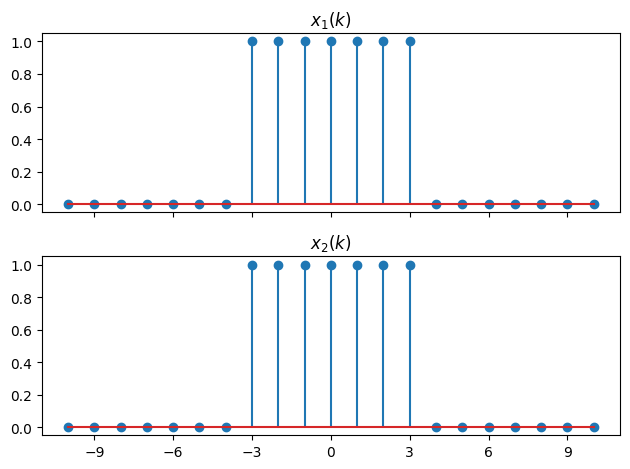

In [13]:
def sq(k, a, tau):
    """Funktion zur Erstellung von Rechtecksignalen"""
    x = a * (abs(k) <= tau)
    return x

# 2 identische Rechtecksignale erstellen
k = np.arange(-10,11)
x1 = sq(k, 1, 3)
x2 = sq(k, 1, 3)

# Darstellung im Stem-Plot
x, axs = plt.subplots(2, 1, sharex=True)
axs[0].stem(k,x1)
axs[0].set_title("$x_1(k)$")
axs[1].stem(k,x2)
axs[1].set_title("$x_2(k)$")
axs[1].get_xaxis().set_major_locator(plt.MaxNLocator(integer=True))    # Nur ganzzahlige Werte auf x-Achse
plt.tight_layout()

In [63]:
# Were außerhalb des Arrays sind 0, würden aber (zurecht) einen IndexError werfen
def get_at_idx(arr: np.ndarray, idx: int):
    try:
        return arr[idx];
    except IndexError:
        return 0;

def convolve(x_1: np.ndarray, x_2: np.ndarray) -> np.ndarray:
    x_2_size = x_2.shape[0];
    
    conv_size = 2 * x_2_size;
    convolution = np.zeros((conv_size, ), x_1.dtype);

    # for tau in range(-x_2_size, x_2_size):
    #     for t in range(x_2_size):
    #         convolution[tau] += get_at_idx(x_1, tau) * get_at_idx(x_2, t-tau);

    # die Implementation ergibt logisch weniger Sinn, liefert aber nen Ergebnis, was richtiger aussieht....
    for tau in range(conv_size):
        for t in range(x_2_size):
            convolution[tau] += get_at_idx(x_1, t) * get_at_idx(x_2, t-tau);

    return convolution;

In [64]:
conv_1 = convolve(x1, x2);
conv_2 = np.convolve(x1, x2);

print(conv_1);
print(conv_2);

[7 6 5 4 3 2 1 0 0 0 0 0 0 0 0 1 2 3 4 5 6 7 6 5 4 3 2 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 3 4 5 6 7 6 5 4 3 2 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


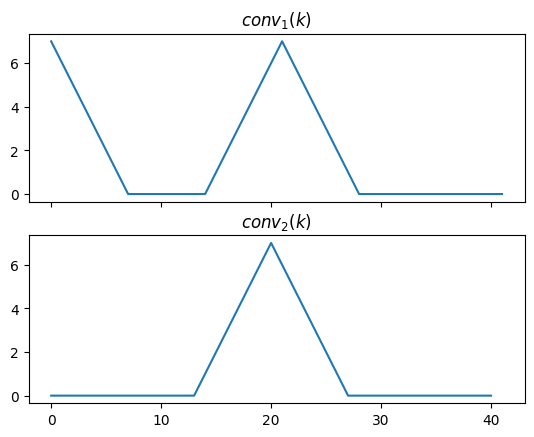

In [65]:
x, axs = plt.subplots(2, 1, sharex=True);
axs[0].plot(conv_1);
axs[0].set_title("$conv_1(k)$");
axs[1].plot(conv_2);
axs[1].set_title("$conv_2(k)$");

## b) (Zusatzaufgabe) Faltung eines Dreiecksignals und eines Rampensignals mit unterschiedlicher Länge

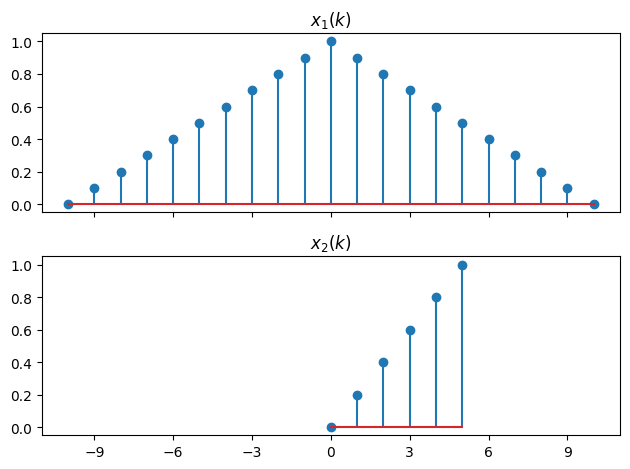

In [12]:
def sq(k, a, tau):
    """Funktion zur Erstellung von Rechtecksignalen"""
    x = a * (abs(k) <= tau)
    return x

def tr(k, a, tau):
    """Dreiecksfunktion"""
    x = a/tau * (tau - abs(k)) * (abs(k) <= tau)
    return x

def rp(k, a, tau):
    """Rampenfunktion"""
    x = a/tau * (k * (k > 0) * (k <= tau))
    return x

# 2 identische Rechtecksignale erstellen
k1 = np.arange(-10,11)
x1 = tr(k1, 1, 10)
k2 = np.arange(0,6)
x2 = rp(k2, 1 , 5)

# Darstellung im Stem-Plot
x, axs = plt.subplots(2, 1, sharex=True)
axs[0].stem(k1,x1)
axs[0].set_title("$x_1(k)$")
axs[1].stem(k2,x2)
axs[1].set_title("$x_2(k)$")
axs[1].get_xaxis().set_major_locator(plt.MaxNLocator(integer=True))    # Nur ganzzahlige Werte auf x-Achse
plt.tight_layout()